# The Best Neighborhoods in Pittsburgh

## Introduction
Here is an analysis of our methodology for selecting the best neighborhoods in Pittsburgh. We assigned scores to each neighborhood based on its rank in the respective sub-metric and then multiplied it by its corresponding weight to obtain the overall score for the neighborhood. Finally, we ranked the neighborhoods based on their total scores to identify the top neighborhoods in Pittsburgh.

## Metrics 
We used three metrics: total arrests, total parks, and the number of gifted students. Among these, we considered security as the most crucial factor and assigned a weight of 50% to it, 40% to parks, and the remaining 20% to the number of gifted students.

## Datasets
* Arrests: This dataset contains information on people taken into custody by City of Pittsburgh police officers. This is the most important metric because nobody wants to live in a crime-ridden neighborhood, even if it has a lot of parks. https://data.wprdc.org/dataset/arrest-data

* Parks: This dataset contains information on parks pittsburgh neighborhoods. Parks play a crucial role in enhancing the quality of life in a neighborhood. They provide recreational spaces and facilities for residents, making them an important factor in determining the overall quality of a neighborhood. https://data.wprdc.org/dataset/parks

* K-12 Students: This dataset contains K-12 enrollment information from all neightborhoods. The number of gifted K-12 students can reflect the educational resources available in each neighborhood. We assume that neighborhoods with more gifted students have better or more schools. This is a crucial factor for students and their parents. https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep

## Code

In [4]:
import pandas as pd
import numpy as np

edu_data = pd.read_csv("datasets/education.csv")
arrest_data = pd.read_csv("datasets/incidents.csv")
park_data = pd.read_csv("datasets/parks.csv")

arrests_by_neighborhood = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts()

arrest_weight = 0.5
park_weight = 0.3
edu_weight = 0.2

arrest_ranking = arrest_data["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending=True)
edu_ranking = edu_data.set_index('neighborhoods')['gifted'].sort_values(ascending = False)
park_ranking = park_data["neighborhood"].value_counts().sort_values(ascending=False)


# the "scores" is a normalized measure of the number of arrests/edu/parks in each neighborhood, which allows for comparison of neighborhoods.
neighborhood_scores = pd.DataFrame(index=arrest_ranking.index)
neighborhood_scores["arrest_score"] = 100 * (arrest_ranking.max() - arrest_ranking) / (arrest_ranking.max() - arrest_ranking.min())
# #It subtracts each neighborhood's incident count from the maximum incident count and then divides by the range (max - min) of incident counts. 
# #This value is then multiplied by 100 to scale it.
neighborhood_scores["edu_score"] = 100 * (1 - ((edu_ranking.max() - edu_ranking) / (edu_ranking.max() - edu_ranking.min())))
# #It subtracts each value from the maximum and then divides by the range. This ratio is subtracted from 1 to invert the scale (since higher enrollment is better), and then multiplied by 100.
neighborhood_scores["park_score"] = 100 * (1 - ((park_ranking.max() - park_ranking) / (park_ranking.max() - park_ranking.min())))

neighborhood_scores["total_score"] = (neighborhood_scores["arrest_score"] * arrest_weight
                                       + neighborhood_scores["edu_score"] * edu_weight
                                       + neighborhood_scores["park_score"] * park_weight)

best_neighborhoods = neighborhood_scores.sort_values("total_score", ascending=False)
top5 = best_neighborhoods.iloc[:5]

## Map
The following map shows the distribution of the best neighborhoods in Pittsburgh.

<Axes: >

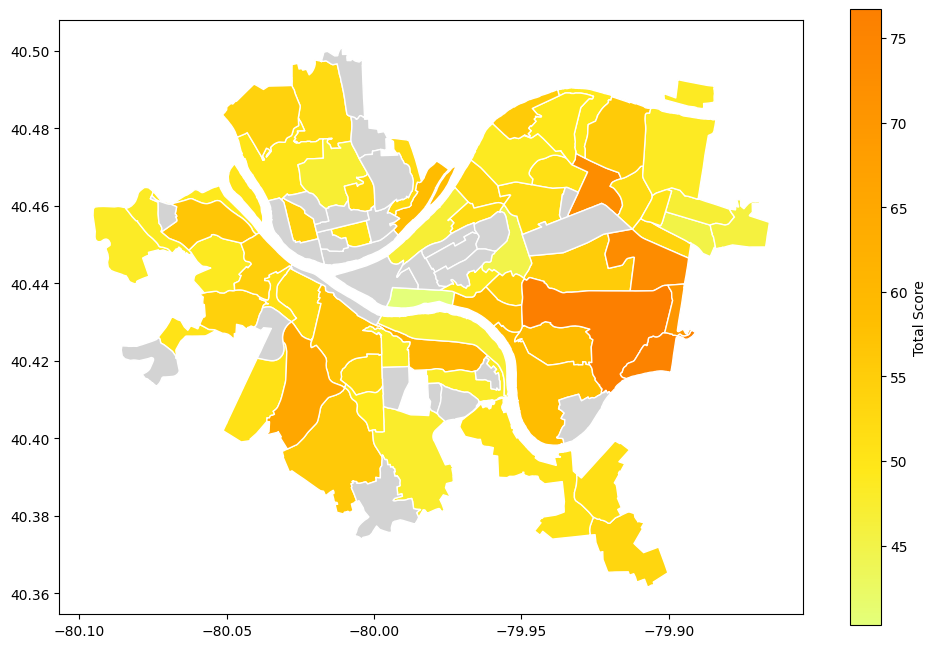

In [3]:
import geopandas

neighborhoods = geopandas.read_file("neighborhoods/neighborhoods.shp")
# do the merge
best_neighborhood_map = neighborhoods.merge(neighborhood_scores, how='left', left_on='hood', right_index=True)
# look at the head to confirm it merged correctly
best_neighborhood_map[['hood','total_score','geometry']].head()

best_neighborhood_map.plot(column='total_score', # set the data to be used for coloring
               cmap='Wistia',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Total Score"}, # label the legend
               figsize=(12, 8),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Conclusion
Based on the total score, we determined that Squirrel Hill is the best neighborhood in Pittsburgh according to our criteria. This is because it has a good balance of parks, gifted students, and low arrest rates in Pittsburgh. The next best neighborhoods are all clustered around Squirrel Hill, east of the city.